# Lab Week 11 - solution

## EOSC 211

<img src="images/example_plot.png">


### Learning Objectives:

1. Use the python pathlib module to create a folder tree and organize your data
2. Use a new package, pandas, for data analysis (you can think of pandas as spreadsheets on steroids)

In [1]:
import pandas as pd  # this one is new
import numpy as np
from pathlib import Path  # and this one
import matplotlib.pyplot as plt
#import scipy.stats as st

pd.set_option('display.max_columns', None) # this shows ALL of the columns of a dataFrame

## Introduction

For most people, doing math on a computer means using a spreadsheet:  [between 0.75 - 2 billion people](https://askwonder.com/research/number-google-sheets-users-worldwide-eoskdoxav) use either Microsoft Excel
or Google sheets to get work done every day.  In contrast to numpy arrays, a spreadsheet table can have
many different data types across columns, and rows and columns can be referenced as named ranges,
so that a spreadsheet formula might look like `=sum(receipts)`, where `receipts` is the label for
table column `J`.  Spreadsheets also allow you to do simple database operations, like [merging tables based on an index](https://www.ablebits.com/office-addins-blog/2018/10/31/excel-merge-tables-matching-columns/).

The python equivalent of a spreadsheet table is a [pandas dataframe](https://realpython.com/pandas-dataframe/), which is a 2-dimensional data type in which columns and rows can be accessed by either column/row numbers
or index labels.  

Dataframes originated in the statistical languge `S` (the ancestor of `R`) and are central to both statistical
computing and data analysis.  Pandas is a large library, and we're going to just skim part of it here, but
there are great references (including jupyter notebooks) in the reference list below.

## Part 1: Folder Trees and Pathlib

Before we start working with dataframes, we need to get more organized about how to handle files and folders
in python.  We've been putting data alongside notebooks in a single folder for each lab, but there is 
the obvious problem that the same dataset can be used for multiple projects, and having dozens of files
in a folder makes it hard to organize your work.

In this lab we need to construct the following folder tree:

```
+ myhome
    + eosc211
        + lab_wk11
            + data
                + raw
                + processed

```

where `myhome` is your "home folder" which we will define in below.  On my windows laptop
`myhome` is `C:\Users\phil` and the full path to `processed` is `C:\Users\phil\eosc211\lab_wk11\data\processed`.  On our jupyterhub `myhome` is `/home/jovyan` and the pathname is `/home/jovyan/eosc211/lab_wk11/data/processed`.

### Using Pathlib

The python pathlib module provides a way to specify folder paths that is portable across macos, windows
and linux. As a general principle, it is always good to write code that works across operating systems whenever possible. Here is how you locate your home folder with pathlib:

In [2]:
myhome = Path.home()
print(f"{myhome=}")

myhome=PosixPath('/home/phil')


and here is how you use the Path.mkdir method to
make a nested `lab_wk11` folder (aka directory) below the home folder:

In [3]:
lab11 = myhome / 'eosc211/lab_wk11'  # note the "/" symbol takes on a different meaning here than usual
lab11.mkdir(parents=True, exist_ok=True)
print(f"{lab11=}")

lab11=PosixPath('/home/phil/eosc211/lab_wk11')


### Creating Multiple Folders

In [4]:
# create two new folders "raw" and "processed", which are subfolders of "data"
new_dirs = ['data/raw','data/processed']
for the_dir in new_dirs:
    curr_dir = lab11 / the_dir
    curr_dir.mkdir(parents=True,exist_ok=True)

### Searching Files and Folders

Once you have a folder tree you can search through it for files
matching specific patterns.  This is called `globbing` and the pattern that matches
any path or name is `*`, known as the `wildcard`.  In the cell below we use globbing to start in the 
`lab11` folder and recursively descend through all that folder's children, listing them:

In [5]:
all_dirs = list(lab11.glob('**/*'))
for this_dir in all_dirs:
    print(f"found {this_dir}")

found /home/phil/eosc211/lab_wk11/data
found /home/phil/eosc211/lab_wk11/data/raw
found /home/phil/eosc211/lab_wk11/data/processed
found /home/phil/eosc211/lab_wk11/data/weather_YVR.csv


### Exploring the Folder Tree

To see how your folder tree looks from a terminal or explorer/finder, do the following:

1) open a miniconda powershell window (on a windows laptop) or a bash terminal on jupyterhub or macos
2) type `cd ~`  (spanish tilde) to change to your home folder  
3) type `cd eosc211` to change to the top folder in our tree.
4) type `ls` to list the folders in the current directory  
5) type `cd ..` to move up one folder, or `cd foldername` to move into a folder named foldername.  
6) If you want to add a folder, on the commandline do:
   `mkdir foldername`  


On your laptop, you can also start explorer (windows) or finder (macos) in a folder by typing:

`open .`  (for macos)

or 

`start .`  (for windows)

Try adding a folder to your new eosc211 tree with explorer or finder -- does it appear in
the all_dirs list when you cell above?

## Part 2:  Data Analysis With Pandas

<img src="images/panda.jpg"> </img>

Check out [the site I found this photo from](http://www.kidssearch.com/PicturesOfPanda.html) if you need to relax for a few minutes. Also, look at how the image is referenced (double click here to see raw markdown). Note the file path!

Pandas is a python library purpose-built for types of data processing we often do in the earth sciences.
The core object of the pandas library is the *dataFrame*, which we can think of like a hybridized version
of a numpy array and a dictionary, laid out to resemble a standard data table. 
Dataframes store data in a 2-d grid,
but instead of referencing by numerical index, we can give each row and column a sensible name. 
Much easier to keep track of, and provides a level of automatic documentation about the data values. 
Pandas is also a very good choice for parsing `.csv` or `.xlsx` data, 
we can load spreadsheets and manipulate them with all of the pythonic tricks we have gathered over the term.

**Summary**

- Pandas is a library for working with **labelled** tabular data (1-D and 2-D)
  - Data formats include: comma separated values (CSV) and other text files, Excel spreadsheets, HDF5, [and others](https://pandas.pydata.org/pandas-docs/stable/io.html)  
- With `pandas` you can do pretty much everything you would in a spreadsheet, plus a whole lot more!

### Pandas dataframes vs. numpy arrays

* Dataframes are **column oriented**, arrays are **row oriented**
* Array items are all of the same dtype (i.e. numpy.float32), dataframe columns can
  have different types (e.g.strings vs. integers)
* Dataframe columns (referred to as a pandas.Series [in the week 11 reading](https://phaustin.github.io/eosc211_students/wk11/pythia_pandas.html#the-pandas-series)) 
  can be indexed by name (e.g. "Total area of basin") or by integer index
* Dataframe rows can be indexed by number or by a special index (e.g. postal code)
* Dataframe objects have dozens of methods to summarize and manipulate the data they hold, 
  making them similar in features to a lightweight relational database.

### Further Reading Beyond This Lab

- `pandas` = [Python Data Analysis Library](https://pandas.pydata.org/)
- [software carpentry pandas lesson](https://swcarpentry.github.io/python-novice-gapminder/08-data-frames/index.html)
- Best book: [Python for data analysis](https://github.com/wesm/pydata-book) by Wes McKinney
- Jennifer Walker's [Pandas cheatsheet](https://phaustin.github.io/eosc211_students/wk11/lab_wk11/pandas-cheatsheet.html)

### Reading a CSV file with Pandas

You should see `weather_YVR.csv` on our canvas homepage, which is a list of 29,000 weather measurements taken
at the Vancouver International Airport between 1938-2017/ Copy this file into `myhome/eosc211/lab_wk11/data` 
using `explorer/finder`, or if you're on the hub, the `files` page as demonstrated in class.  If you've done this
correctly then the following wildcard search should find it:

In [6]:
weather_file = list(lab11.glob('**/w*csv'))[0]
print(f"{weather_file=}")

weather_file=PosixPath('/home/phil/eosc211/lab_wk11/data/weather_YVR.csv')


In the cell below, import the `.csv` file as a pandas dataframe. Your dataframe should include columns `Date, Year, Month, Day, T_mean (C), T_high (C), T_low (C), Rain (mm), Snow (cm), Total Precip (mm)` 

Name the dataframe `weather_YVR`

**Hint:** This week's reading has a helpful example of `pd.read_csv`

In [7]:
### BEGIN SOLUTION
# andrew's soln 
# https://phaustin.github.io/eosc211_students/wk11/pythia_pandas.html#the-pandas-dataframe
weather_YVR = pd.read_csv(weather_file, index_col=0, parse_dates=True)
### END SOLUTION

# show the first 6 lines of the dataframe
weather_YVR.head(6)

,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm)
Date,,,,,,,,,
1938-01-01,1938,1,1,4.4,9.4,-0.6,NaN,NaN,0.3
1938-01-02,1938,1,2,4.5,7.2,1.7,NaN,NaN,0.5
1938-01-03,1938,1,3,1.7,7.2,-3.9,0.0,0.0,0.0
1938-01-04,1938,1,4,2.2,7.2,-2.8,0.0,0.0,0.0
1938-01-05,1938,1,5,2.2,7.2,-2.8,0.0,0.0,0.0
1938-01-06,1938,1,6,2.3,5.6,-1.1,0.0,0.0,0.0


### Data at a Glance

`pandas` provides many ways to quickly and easily summarize your data. What do each of the following compute?

`weather_YVR.shape` (notice the difference from `np.shape(arr)`, like we use to get the shape of a numpy array)

`weather_YVR.columns`

`weather_YVR.mean()`

`weather_YVR.describe()`

In [8]:
# try each of the above here (dont need to hand in). 

### Using the `groupby()` Function

Now that we have some ideas about the general characteristics of our data (is the dataset relatively *complete*? Do the values *make sense*?), it's time to do some analysis. Say we would like to know about the cumulative precipitation in each month, averaged over a particular decade (1980-1990, for example). Use pandas built in groupby() function to split the raw data into a separate data frame for each decade (1930-2010).

**Hint:** There is no `"decade"` column in the dataframe, so how are you going to assign each year to its decade using python and then add that information to
the dataframe for each measurement? 

First think about how you would extract the year of an observation form `weather_YVR` 
row and then how you would convert, 
say, all the years in the 1930s to be assigned to the 1930 decade.  Once you've 
figured this out, follow the example in the week11 reading (where they add a `month` column)
to add a new column called `decade` to the dataframe, and then use groupby on that column to produce a
groupby object containing a DataFrame for each of the 9 decades.  Finally, use
the `dict(tuple(df_groups)))` trick to turn that groupby object into a dictionary.  Your dictionary keys
should look like:  `dict_keys([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])`

Call that dictionary `decades` -- we'll depend on that name in the cells below

In [9]:
### BEGIN SOLUTION
# andrew's soln
decade_col = (weather_YVR.index.year//10)*10
weather_YVR['the_dec'] = decade_col
decades = weather_YVR.groupby('the_dec')
decades = dict(tuple(decades))  

# what did we just produce?
print(f"{type(decades)=}")
print(f"{decades.keys()}")
### END SOLUTION

type(decades)=<class 'dict'>
dict_keys([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])


In [10]:
assert(len(decades) > 0)

In [11]:
# decades is a dictionary, what are the keys?
decades.keys()

dict_keys([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])

In [12]:
# okay, so the keys are integers representing each decade. What are the values of the "decades" dict?
decades[1940].head(10)

,Year,Month,Day,T_mean (C),T_high (C),T_low (C),Rain (mm),Snow (cm),Total Precip (mm),the_dec
Date,,,,,,,,,,
1940-01-01,1940,1,1,8.9,11.7,6.1,5.8,0.0,5.8,1940
1940-01-02,1940,1,2,9.7,11.1,8.3,7.1,0.0,7.1,1940
1940-01-03,1940,1,3,7.8,9.4,6.1,1.0,0.0,1.0,1940
1940-01-04,1940,1,4,8.1,11.7,4.4,0.5,0.0,0.5,1940
1940-01-05,1940,1,5,7.0,8.3,5.6,0.8,0.0,0.8,1940
1940-01-06,1940,1,6,5.0,8.3,1.7,0.0,0.0,0.0,1940
1940-01-07,1940,1,7,1.4,6.7,-3.9,0.0,0.0,0.0,1940
1940-01-08,1940,1,8,1.2,6.7,-4.4,0.0,0.0,0.0,1940
1940-01-09,1940,1,9,2.2,4.4,0.0,3.3,0.0,3.3,1940


### Using Pandas Built-in Plotting 

Let's display our data with a bar chart, pandas style! This is all still the matplotlib that we know and love,
but the functions are called via the pandas library, instead of doing it directly. Pandas has some built-in intuition about plot formatting, so oftentimes this takes care of things like axis labels without having to explicitly specify them. 

This cell creates a bar chart of average monthly rainfall for the years 1960-1969:

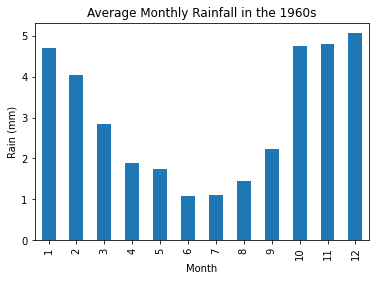

In [13]:
the_ax = (decades[1960]
          .groupby("Month")["Rain (mm)"]
          .mean()
          .plot
          .bar(ylabel="Rain (mm)",
               title=f"Average Monthly Rainfall in the 1960s"));

Using the code in the cell above, write a function called `plot_monthly_average()` which takes a pandas dataframe stored in the `decades` dictionary (remember the keys to the `decades` dictionary are just integers representing each decade, so e.g. `decade[1980]` is the dataframe for the 1980s) and some variable (e.g. `YVR_1960`, `Rain (mm)`), and creates a bar chart of that variable for each month, averaged over the whole decade. Include a docstring and some checks on the input arguments.

In [14]:
### BEGIN SOLUTION
# andrew's soln
def plot_monthly_average(decade_df, var):
    """
    IN: pandas dataframe containing columns "Year", "Month", and a variable "var" to 
        be plotted on by month, averaged over the whole dataframe
        
    OUT: returns None, produces a bar chart of each month and averaged variable
    """

    the_ax = (decade_df
              .groupby("Month")[var].mean()
              .plot
              .bar(ylabel=var,
                   title=f"Average Monthly {var} in the {decade_df.Year[0]}s"))  
    return None
### END SOLUTION

### Use your function

In the cells below, call your function to create histogram plots of the following:
    
A) Mean temperature, by month from 1980-1989 

B) Mean total precip, by month from 1960-1969

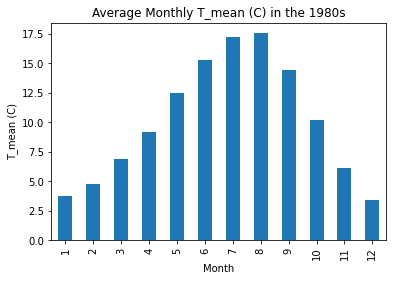

In [15]:
# A)
### BEGIN SOLUTION
plot_monthly_average(decades[1980], "T_mean (C)")
### END SOLUTION

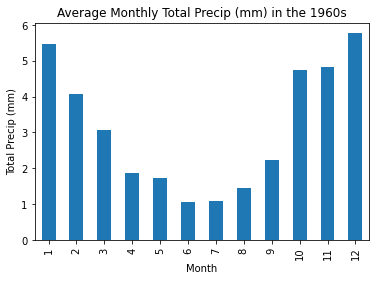

In [16]:
# B)
### BEGIN SOLUTION
plot_monthly_average(decades[1960], "Total Precip (mm)")
### END SOLUTION

### One more demonstration: Can we see global warming at YVR?

You can do much more with this dataset.  As one more example, here is code to
compare the decadal change in low temperature, high temperature, and rainfall
at YVR

In [17]:
compare_decs = {}
decade_list = [1960, 1980, 2000, 2010]
for the_decade,the_df in decades.items():
    compare_decs[the_decade]={}
    for the_var in ['T_low (C)','T_high (C)', 'Rain (mm)']:
        compare_decs[the_decade][the_var] = the_df.groupby("Month")[the_var].mean()

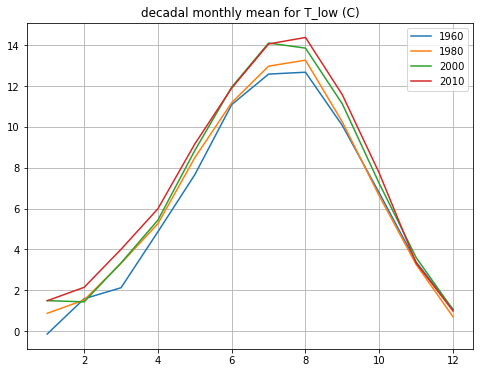

In [18]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
the_var = 'T_low (C)'
for the_decade in decade_list:
    ax.plot(compare_decs[the_decade][the_var],label=the_decade)
ax.set_title(f"decadal monthly mean for {the_var}")
ax.legend()
ax.grid(True)

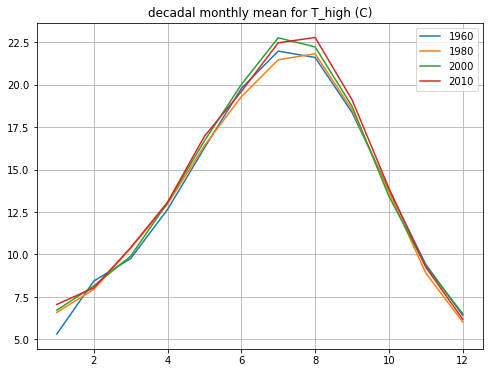

In [19]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
the_var = 'T_high (C)'
for the_decade in decade_list:
    ax.plot(compare_decs[the_decade][the_var],label=the_decade)
ax.set_title(f"decadal monthly mean for {the_var}")
ax.legend()
ax.grid(True)

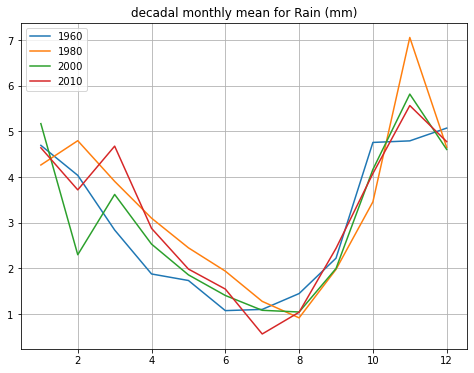

In [20]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
the_var = 'Rain (mm)'
for the_decade in decade_list:
    ax.plot(compare_decs[the_decade][the_var],label=the_decade)
ax.set_title(f"decadal monthly mean for {the_var}")
ax.legend()
ax.grid(True)

### Final Comments

This lab is just the tip of the iceberg when it comes to using Pandas or other python libraries to do data analysis. We could have just as well completed all of this lab with our familiar numpy arrays and produced the same result -- There are always multiple ways to solve the same problem with code, and choosing the best tool for the job is often far from obvious. Choose tools that work for you for the task at hand!

**Optional Extras:** There are other variations of the pandas library, two of which are particularly helpful for geosciences applications. 

1) [Xarray](http://xarray.pydata.org/en/stable/index.html): *Like pandas but in generalized to 3D, 4D.. ND. These are really good for processing field data of the sort that you encounter in meteorology or oceanography, for example, the temperature field in a 3D slice of the atmosphere, salinity in the ocean, currents, etc. Save this link for later and do some exploring!*

2) [Geopandas](https://geopandas.org/en/stable/): *A version of pandas with added functionality for parsing common GIS datatypes, like .KML, .shp, .shx, .dbf. You can do pretty much everything in python that you might try in a program like ArcGIS, with the added advantage of looping through big datasets, etc.*